<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Here I imported all of the neccessary librarys and read the spam dataframe, 'spam.csv', into df_original</p>
<p>[1 Mark]</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import math

df_original = pd.read_csv('spam.csv', encoding = 'latin-1')
df_original

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>To clean the data, first I removed the droped the unused columns, Unnamed: 2, Unnamed: 3... from the df_original dataframe </p>

In [2]:
clean = df_original.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

<p>then I renamed the column names</p>

In [3]:
clean.columns = ['Category', 'Message']

<p>Lastly I removed the non alpha characters and change all characters to lower character</p>

In [4]:
clean['Message'] = clean['Message'].str.replace(r'[^a-zA-Z ]*','')
clean['Message'] = clean['Message'].str.lower()
clean

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>3. Split the Data</h3>
<p>Here I Split the data into two random samples, one for training the model and the other for testing the model.  with name train_data and test_data.  Since The train_data DataFrame should contain 75% of the data and the test_data DataFrame the remaining 25%, I calculated total_row*3/4 as the seperating_row with rows with index lower than seperating_row being the train_data and rows with index higher than the seperating row as the test_data<p>  


In [5]:
total_row = len(clean.index)
print(total_row)
seperating_row = int(total_row*3/4)
print(seperating_row)
train_data = clean.iloc[:seperating_row]
test_data = clean.iloc[seperating_row:]

display(test_data)
display(train_data)

5572
4179


,Category,Message
4179,ham,swhrt how u deyhope ur ok tot about u daylove ...
4180,ham,ok da i already planned i wil pick you
4181,spam,urgent please call your abta complimentary s...
4182,ham,sorry ill call later in meeting
4183,ham,i just really need shit before tomorrow and i ...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
4174,ham,how are you doing hows the queen are you going...
4175,ham,hes in lag thats just the sad part but we keep...
4176,ham,ok lor then we go tog lor
4177,ham,two teams waiting for some players


<h3>4. Create a Word Frequency DataFrame</h3>
<p>In order to create a word frequency dataframe. First I have iterrate over each row of the train_data and append all words into train_list</p>

In [6]:
train_list = []

print(train_data)
for index, row in train_data.iterrows():
    train_list = train_list + re.split("( )",row.Message)

     Category                                            Message
0         ham  go until jurong point crazy available only in ...
1         ham                            ok lar joking wif u oni
2        spam  free entry in  a wkly comp to win fa cup final...
3         ham        u dun say so early hor u c already then say
4         ham  nah i dont think he goes to usf he lives aroun...
...       ...                                                ...
4174      ham  how are you doing hows the queen are you going...
4175      ham  hes in lag thats just the sad part but we keep...
4176      ham                          ok lor then we go tog lor
4177      ham                 two teams waiting for some players
4178      ham                   can  send me a copy of da report

[4179 rows x 2 columns]


<p>Then I have removed spaces, nulls and duplicates from the train_list</p>

In [7]:
train_list = list(dict.fromkeys(train_list))
train_list.remove(' ')
train_list.remove('')

<p>Afterward I divided train_data into spam_train_data and ham_train_data to make it easier to calculate the frequency</p>

In [8]:
spam_train_data = train_data[train_data['Category'] == 'spam']
ham_train_data = train_data[train_data['Category'] != 'spam']

<p>Lastly I use the .Message.str.contains method to search for three patterns: " word", " word ", "word " and use sum method to count the frequency of each word, append it to the ham_list and spam_list, and create frequency_df using train_list,spam_list, and ham_list </p>

In [9]:
spam_list = []
ham_list = []

for length in range(len(train_list)):
    ham_list.append(ham_train_data.Message.str.contains(" "+train_list[length]+"$|^"+train_list[length]+"| "+train_list[length]+" ").sum())
    spam_list.append(spam_train_data.Message.str.contains(" "+train_list[length]+"$|^"+train_list[length]+"| "+train_list[length]+" ").sum())

# print(spam_list)
# print("spam_list")

frequency_df = pd.DataFrame(data={'Word':train_list,'#Spam':spam_list, '#Ham':ham_list})
frequency_df

,Word,#Spam,#Ham
0,go,26,233
1,until,5,18
2,jurong,0,1
3,point,0,11
4,crazy,2,8
...,...,...,...
7296,teeth,0,1
7297,hidden,0,1
7298,royal,0,1
7299,tog,0,1


<h3>5. Visualise the Data</h3>
<p>Since I choose to use the first 20 words to make the word cloud, I first sorted the frequency_df based on #Spam and #Ham and copy the first 40 words into ham_words and spam_words list</p>



In [10]:
frequency_df = frequency_df.sort_values(by=['#Ham'],ascending=False)
ham_words = frequency_df.iloc[:40]

frequency_df = frequency_df.sort_values(by=['#Spam'],ascending=False)
spam_words = frequency_df.iloc[:40]

display(frequency_df)
print(ham_words)

display(frequency_df)
print(spam_words)

,Word,#Spam,#Ham
31,to,360,924
130,call,242,165
28,a,230,844
80,you,181,1006
105,your,159,262
...,...,...,...
5475,jenne,0,1
5468,famamus,0,1
5466,carso,0,1
5465,imaginationmy,0,1


      Word  #Spam  #Ham
55       i     36  1360
80     you    181  1006
31      to    360   924
28       a    230   844
143    the    122   693
7       in     51   550
24       u    146   531
72     and     92   519
98      me     23   496
94      is    108   457
92      my      9   445
83      it     22   383
1341     h     35   376
48      so     29   358
253   that     23   353
354     of     75   340
82     for    131   340
124   have     96   312
150     im     11   305
345    but      4   302


,Word,#Spam,#Ham
31,to,360,924
130,call,242,165
28,a,230,844
80,you,181,1006
105,your,159,262
...,...,...,...
5475,jenne,0,1
5468,famamus,0,1
5466,carso,0,1
5465,imaginationmy,0,1


       Word  #Spam  #Ham
31       to    360   924
130    call    242   165
28        a    230   844
80      you    181  1006
105    your    159   262
24        u    146   531
71      now    143   210
26     free    141    42
138      or    132   160
82      for    131   340
246      ur    123   141
143     the    122   693
42      txt    115     7
94       is    108   457
124    have     96   312
149      on     94   287
170    from     93   110
72      and     92   519
129   claim     84     0
136  mobile     78     9


<p>then I used the wordcloud import to plot the ham and spam wordcloud as shown below</p>

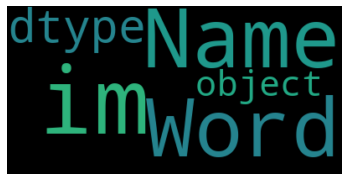

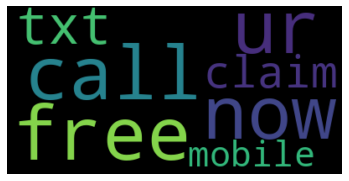

In [11]:
wordcloud = WordCloud().generate(str(ham_words['Word']))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


wordcloud = WordCloud().generate(' '.join(spam_words['Word']))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>I used the equation below to calculate the $P\left(E\middle| S\right)$, and set k = 0.5 to smoothing the probability</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Moreover, for convience instead of creating a new dataframe, I set the value of #Spam and #Ham to spam_probability and ham_probability and changed the column names</p>


In [12]:
total_spam = len(spam_train_data)
total_ham = len(ham_train_data)
print(total_spam)
print(total_ham)
k = 0.5

for index, row in frequency_df.iterrows():
    spam_frequency = row['#Spam']
    spam_probability = (spam_frequency + k) / (total_spam + 2*k)
    frequency_df.loc[frequency_df.Word == row['Word'],'#Spam'] = spam_probability    
    
    ham_frequency = row['#Ham']
    ham_probability = (ham_frequency + k) / (total_ham + 2*k)
    frequency_df.loc[frequency_df.Word == row['Word'],'#Ham'] = ham_probability
    
frequency_df = frequency_df.rename(columns={'#Spam':'P(E|S)','#Ham':'P(E|¬S)'})
display(frequency_df)
    

565
3614


,Word,P(E|S),P(E|¬S)
31,to,0.636926,0.255740
130,call,0.428445,0.045781
28,a,0.407244,0.233610
80,you,0.320671,0.278423
105,your,0.281802,0.072614
...,...,...,...
5475,jenne,0.000883,0.000415
5468,famamus,0.000883,0.000415
5466,carso,0.000883,0.000415
5465,imaginationmy,0.000883,0.000415


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Using the formula below i was able to calculate the spamliness of single word. It is important to note that I have set P(S), spam_probability as 0.4</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>

<p>[2 Marks]</p>

In [13]:
spam_probability = 0.4
ham_probability = 1 - spam_probability

test_word = 'to'

p_given_spam = frequency_df.loc[frequency_df['Word'] == test_word, 'P(E|S)'].values[0]
p_given_ham = frequency_df.loc[frequency_df['Word'] == test_word, 'P(E|¬S)'].values[0]

p_spam = p_given_spam*spam_probability/(p_given_spam*spam_probability+p_given_ham*ham_probability)
p_ham = 1 - p_spam

print("output")
print("Word = ['" + test_word + "']")
print("P(E|S) = [" + str(round(p_given_spam, 8)) + "]")
print("P(E|¬S) = [" + str(round(p_given_ham, 8)) + "]")
print("P(S|E) = [" + str(round(p_spam,8)) + "]")
print("P(¬S|E) = [" + str(round(p_ham,8)) + "]")

output
Word = ['to']
P(E|S) = [0.6369258]
P(E|¬S) = [0.25573997]
P(S|E) = [0.62410924]
P(¬S|E) = [0.37589076]


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message I have multiply the probabilities under the assumption that the words appear as independent events hence the naïve Bayes, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, and I have store the calculations in a list named prob_spam.  Likewise calculation for probability of ham word in prob_ham when the word is found in the frequency_df.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam(return false), then I would assume the message as spam (return tru).
</p>


In [14]:
def check_spam(test_words):
    prob_spam = []
    prob_ham = []
    spam_result = 1
    ham_result = 1
    

    for word in test_words:
        if word in frequency_df.Word.values:
            spam_probability = 0.4
            ham_probability = 1 - spam_probability
            test_word = word
            
            p_given_spam = frequency_df.loc[frequency_df['Word'] == test_word, 'P(E|S)'].values[0]
            p_given_ham = frequency_df.loc[frequency_df['Word'] == test_word, 'P(E|¬S)'].values[0]
            
            p_spam = p_given_spam*spam_probability/(p_given_spam*spam_probability+p_given_ham*ham_probability)
            p_ham = p_given_ham*ham_probability/(p_given_spam*spam_probability+p_given_ham*ham_probability)
            
            prob_spam.append(p_spam)
            prob_ham.append(p_ham)
            
            
    
    for items in range(len(prob_ham)):
        spam_result = spam_result * prob_spam[items]
        ham_result = ham_result * prob_ham[items]
        
                       
    print(spam_result)
    print(ham_result)
    spam = False
    if spam_result > ham_result:
        spam = True
        
    print(spam)
    
    return spam


<p>Below is a example of how the function can be used</p>

In [15]:
check_spam(["word","is","good"])

0.09411148060702866
0.048320340464635014
True


True

<h3>9. Avoiding floating point underflow</h3>
<p>Since multiplying a set of small probabilities could result in a floating-point error.  Therefore below I took the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, I used the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers I have added them):</p>
$$
P(S|x_1,x_2,\dots,x_N)=P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_N|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_N))=\log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_N|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_N|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_N|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_N|\neg S))
$$
</p>

In [16]:
def check_spam_refined(test_words):
#     print(test_words)
    p_spam_list = []
    p_ham_list = []
    spam_probability = 0.4
    ham_probability = 1 - spam_probability
    spam_result = math.log(spam_probability)
    ham_result = math.log(ham_probability)
    

    for word in test_words:
        if word in frequency_df.Word.values:
            spam_probability = 0.4
            ham_probability = 1 - spam_probability
            test_word = word
            
            p_given_spam = frequency_df.loc[frequency_df['Word'] == test_word, 'P(E|S)'].values[0]
            p_given_ham = frequency_df.loc[frequency_df['Word'] == test_word, 'P(E|¬S)'].values[0]

            p_spam = p_given_spam*spam_probability/(p_given_spam*spam_probability+p_given_ham*ham_probability)
            p_ham = p_given_ham*ham_probability/(p_given_spam*spam_probability+p_given_ham*ham_probability)
            
            p_spam_list.append(p_spam)
            p_ham_list.append(p_ham)
            
            
    
    for items in range(len(p_spam_list)):
        spam_result = spam_result + math.log(p_spam_list[items])
        ham_result = ham_result + math.log(p_ham_list[items])
                       
#     print(p_spam)
#     print(p_ham)
    
    spam = True
    if spam_result < ham_result:
        spam = False
    
    return spam

<p>Below is a simple example of how to use the model</p>

In [17]:
check_spam_refined(['free'])

True

<h3>10. Testing the Model</h3>
<p>Using the refined check spam model below I tested the accuracy of the model by spliting the message in each row into a list of words and determine whether the list of words is spam or not. Moreover, the statistics are stored in the match_spam, match_ham ... variables </p>


In [18]:
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0
accuracy = 0

for index, row in test_data.iterrows():
    word_list = re.split("( )",row.Message)
    try:
        word_list = [x for x in word_list if x != " "]
        word_list = [x for x in word_list if x != ""]
    finally:
        result = check_spam_refined(word_list)
    if row.Category == 'spam':
        if result:
            match_spam += 1
        else:
            thought_spam_is_ham += 1
    if row.Category == 'ham':
        if result:
            thought_ham_is_spam += 1
        else:
            match_ham += 1



            


<p>I have calculated the accuracy below and printed out the final result</p>

In [19]:
accuracy = (match_spam + match_ham)/(match_ham+match_spam+thought_ham_is_spam+thought_spam_is_ham)
print('match_spam ' + str(match_spam))
print('match_ham ' + str(match_ham))
print('thought_ham_is_spam ' + str(thought_ham_is_spam))
print('thought_spam_is_ham ' + str(thought_spam_is_ham))
print('accuracy ' + str(accuracy))

match_spam 176
match_ham 1158
thought_ham_is_spam 53
thought_spam_is_ham 6
accuracy 0.9576453697056713


<h3>11. Improvements</h3>


<p>1)

Since in real life, words in message doesn't appear as independent events. For instance, a lot of spam email I received contain words "Order Now" or "Get it now". 
Therefore it is possible to create models that not only calculate the spam possibility based on single words, but also based on common phrases in order to further improve the model's accuracy.

2)

Moreover,since in real life, spam messages not only contains words, but often also contains numbers, links, and scrambled words. 
Therefore to obtain a more accurate model, we need to also take into account of those variables. For instance, we can train a model that detects scramble words based on how many "new" words there is in the message, and "train" a model that can differentiate spam numbers from post code, phone number, and train a model that differentiate goverment, official links with virus containig links. 
</p>

<h3></h3>